<a href="https://colab.research.google.com/github/Aditya-k07/LR_studentlifestyle-/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'student_lifestyle_dataset.csv')
print("BEFORE ALL THE PREPROCESSING\n")
print(data.head())

data = data.drop(columns=['Student_ID'])

data.isnull().sum()
scaler = StandardScaler()

numerical_columns = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                     'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                     'Physical_Activity_Hours_Per_Day', 'GPA']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

label_encoder = LabelEncoder()

data['Stress_Level'] = label_encoder.fit_transform(data['Stress_Level'])


data.fillna(data.mean(), inplace=True)




X = data.drop(columns=['Stress_Level'])
y = data['Stress_Level']


print("\nTRAINING READY DATA\n")
print(data.head())


BEFORE ALL THE PREPROCESSING

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  

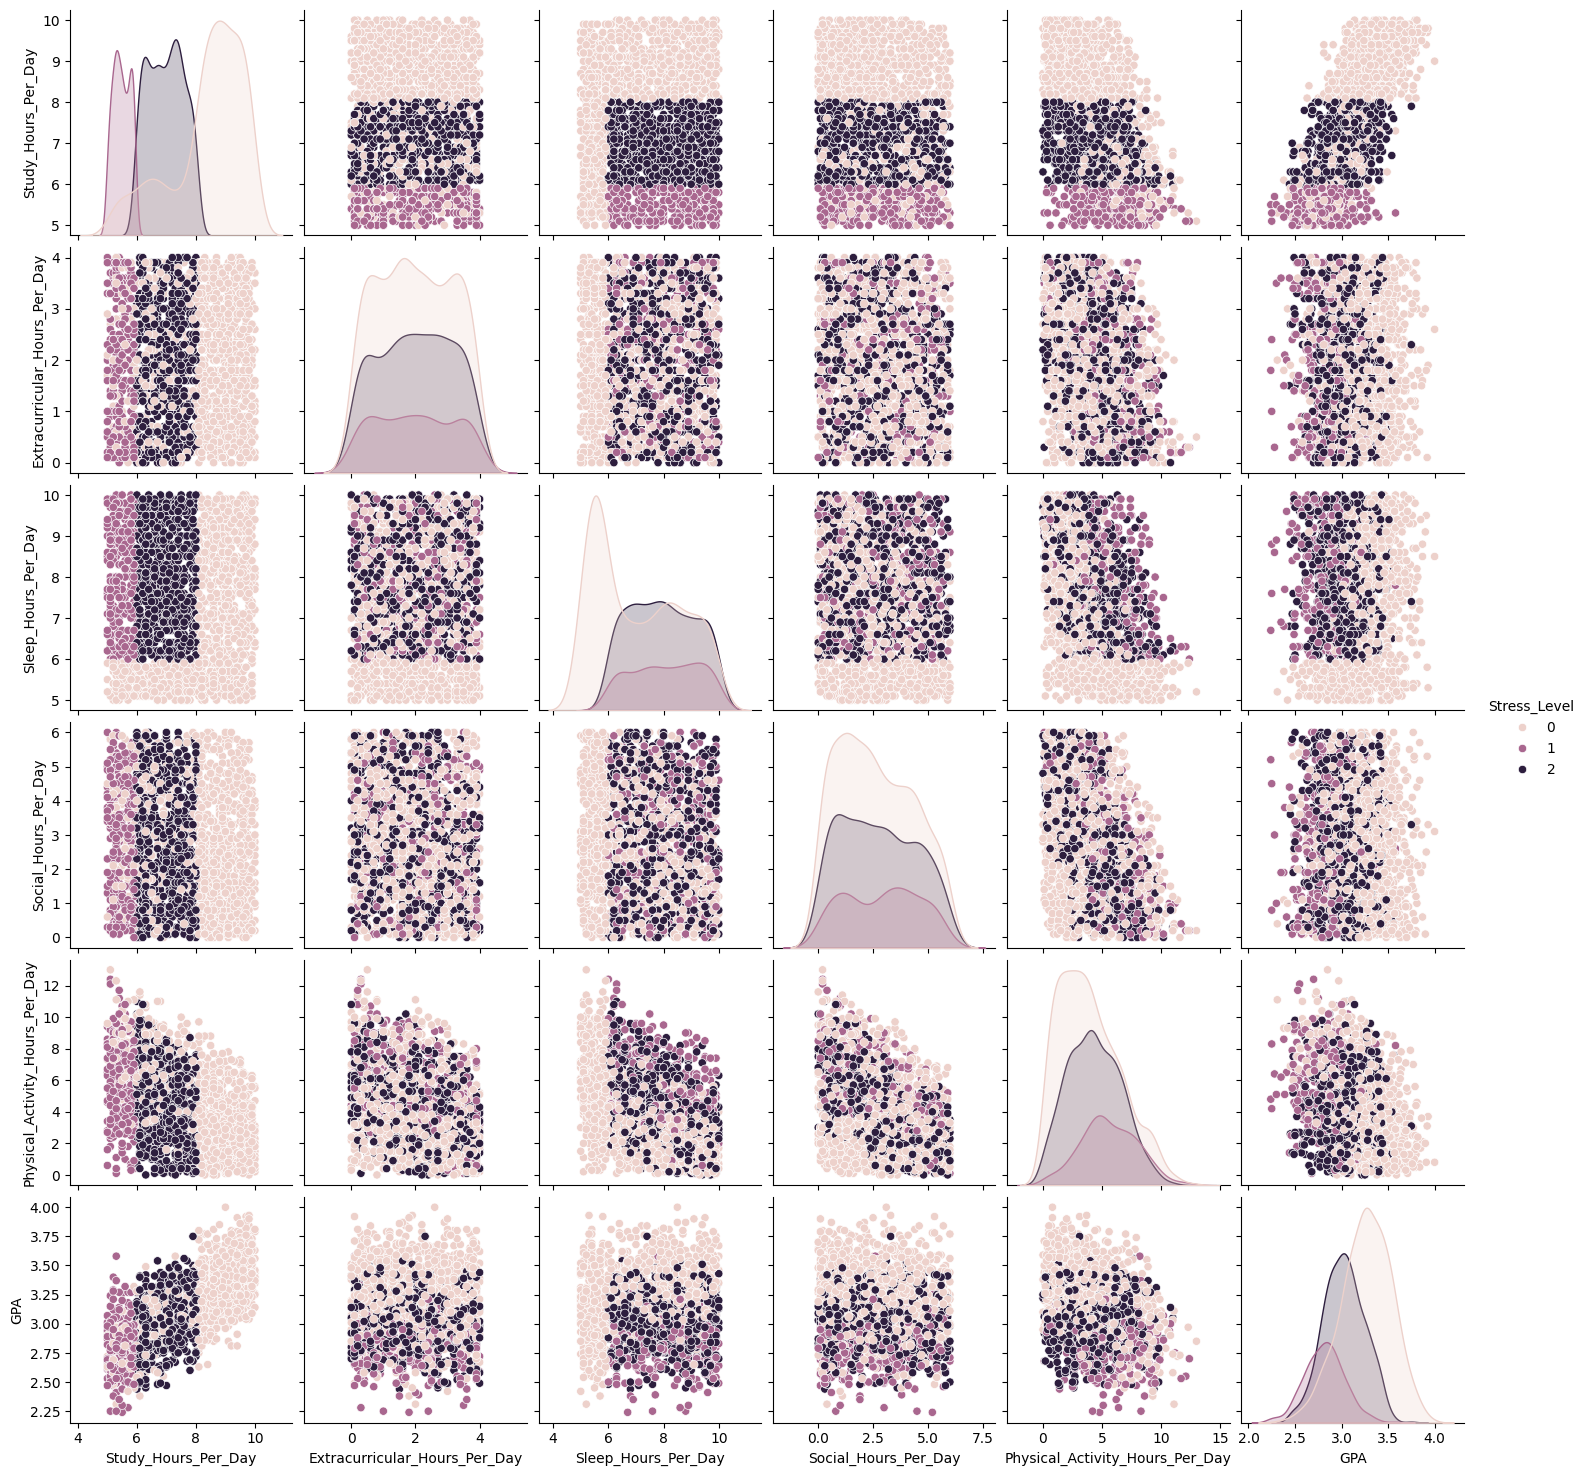

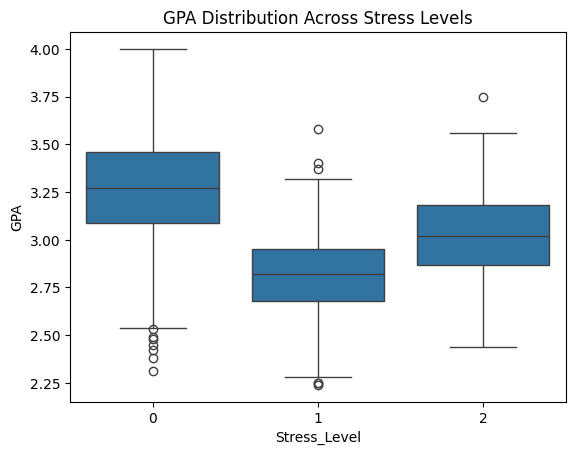

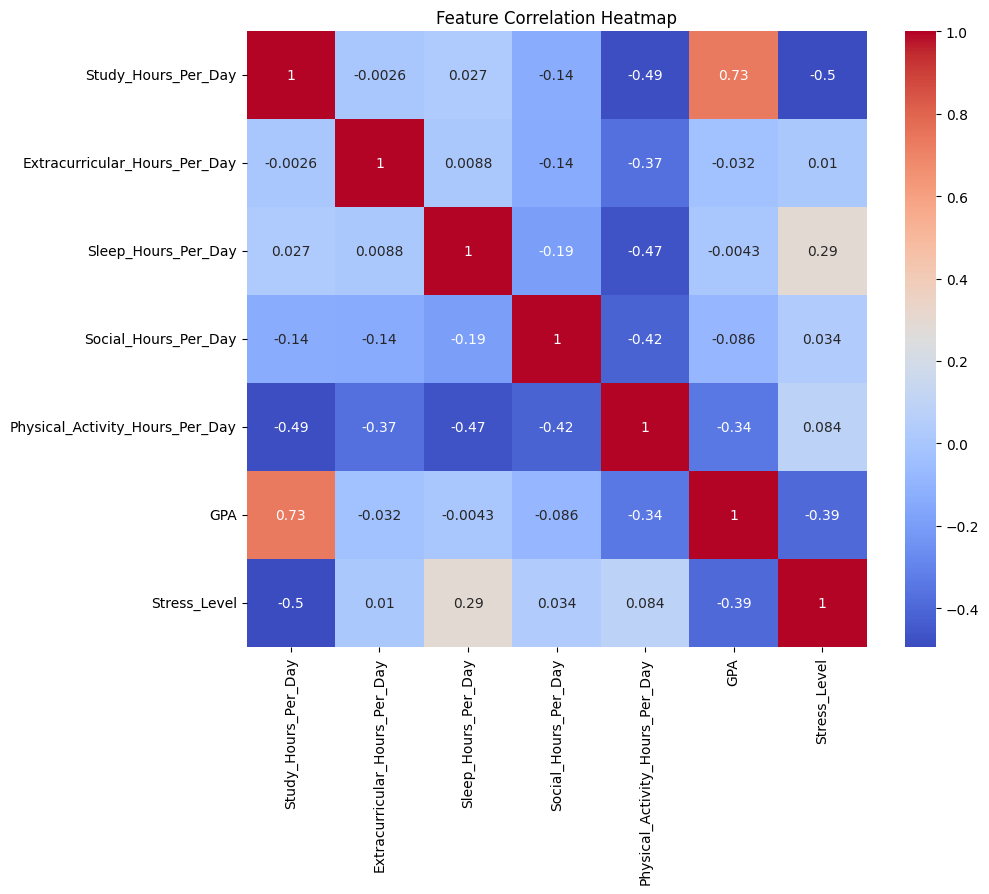

In [ ]:



data2 = pd.read_csv(r'student_lifestyle_dataset.csv')

data2 = data2.drop(columns=['Student_ID'])

label_encoder = LabelEncoder()
data2['Stress_Level'] = label_encoder.fit_transform(data2['Stress_Level'])

sns.pairplot(data2, hue='Stress_Level', diag_kind='kde')
plt.show()

sns.boxplot(x='Stress_Level', y='GPA', data=data2)
plt.title('GPA Distribution Across Stress Levels')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.88      0.87       309
      Medium       0.86      0.90      0.88        89
        High       0.82      0.75      0.78       202

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



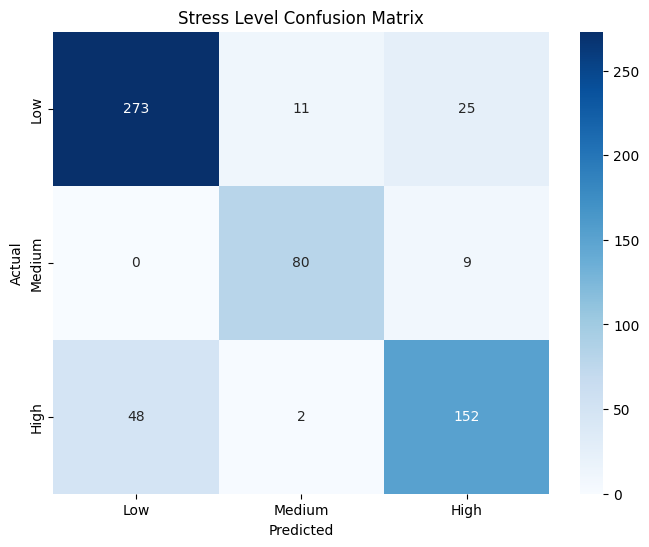

<ipython-input-3-1a1e0b9c5eaa>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


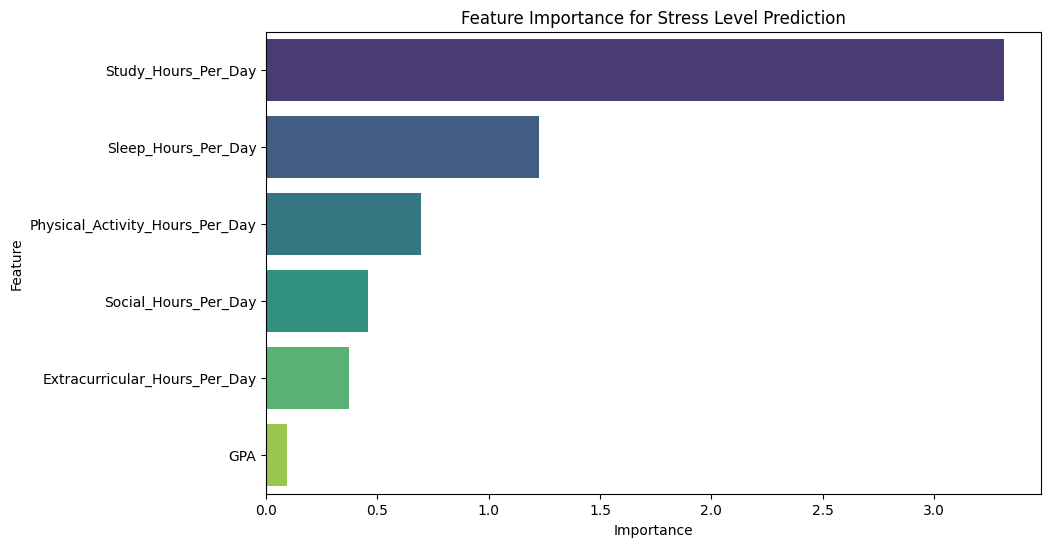

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train model
multi_logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
multi_logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = multi_logreg.predict(X_test_scaled)
y_pred_prob = multi_logreg.predict_proba(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Stress Level Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
plt.figure(figsize=(10,6))
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(multi_logreg.coef_).mean(axis=0)
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance for Stress Level Prediction')
plt.show()

In [ ]:
test_cases = pd.DataFrame({
    'Study_Hours_Per_Day': [1,4,8],
    'Extracurricular_Hours_Per_Day': [6,2, 1],
    'Sleep_Hours_Per_Day': [8, 6, 6],
    'Social_Hours_Per_Day': [3, 2, 0],
    'Physical_Activity_Hours_Per_Day': [3, 2, 1],
    'GPA': [2,3.2, 3.86]
})
test_cases_scaled = scaler.transform(test_cases)

predictions = multi_logreg.predict(test_cases_scaled)
predicted_probabilities = multi_logreg.predict_proba(test_cases_scaled)

results = pd.DataFrame({
    'Test Case': range(1, len(test_cases) + 1),
    'Predicted Stress Level': label_encoder.inverse_transform(predictions),
})

print(results)


   Test Case Predicted Stress Level
0          1                    Low
1          2               Moderate
2          3                   High
